<a href="https://colab.research.google.com/github/avoKAWO/Detekcja-Ruchu-Drogowego/blob/main/Training/Traffic_Detection_f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [4]:
!nvidia-smi

Wed Jun 11 06:51:02 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [6]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 98.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZX0lDKEChF2LUCS5GTdj")
project = rf.workspace("personal-workspace-ccxif").project("road-traffic-detection-wbfiw")
version = project.version(2)
dataset = version.download("yolov12")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Traffic-Detection-2 in yolov12:: 100%|██████████| 8086/8086 [00:01<00:00, 5572.85it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 11
names: ['Different Traffic Sign', 'Green Traffic Light', 'Motorcycle', 'Pedestrian', 'Pedestrian Crossing', 'Prohibition Sign', 'Red Traffic Light', 'Speed Limit Sign', 'Truck', 'Warning Sign', 'car']

roboflow:
  workspace: personal-workspace-ccxif
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=100)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.153 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Road-Traffic-Detection-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resum

100%|██████████| 755k/755k [00:00<00:00, 91.5MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.26M/5.26M [00:00<00:00, 315MB/s]


AMP: checks passed ✅


train: Scanning /content/Road-Traffic-Detection-2/train/labels... 3542 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3542/3542 [00:03<00:00, 1007.07it/s]


train: New cache created: /content/Road-Traffic-Detection-2/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Road-Traffic-Detection-2/valid/labels... 327 images, 0 backgrounds, 0 corrupt: 100%|██████████| 327/327 [00:00<00:00, 1087.48it/s]

val: New cache created: /content/Road-Traffic-Detection-2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      6.75G      3.836      4.799       3.91        124        640: 100%|██████████| 222/222 [02:16<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:07<00:00,  1.38it/s]

                   all        327       3429    0.00129     0.0418   0.000924   0.000245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.87G      3.108      3.261      2.583         94        640: 100%|██████████| 222/222 [02:11<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.38it/s]


                   all        327       3429      0.516     0.0391     0.0324     0.0121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.69G      2.438      2.316      1.917         40        640: 100%|██████████| 222/222 [02:09<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]


                   all        327       3429      0.512      0.116      0.124     0.0563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.67G      2.146      1.967      1.693         86        640: 100%|██████████| 222/222 [02:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.33it/s]


                   all        327       3429      0.439       0.18      0.175     0.0857

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100       6.9G      1.992      1.778      1.568         35        640: 100%|██████████| 222/222 [02:15<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


                   all        327       3429      0.479      0.239      0.231      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      6.71G      1.907      1.643      1.503         93        640: 100%|██████████| 222/222 [02:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]


                   all        327       3429      0.557      0.271      0.262      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      6.86G      1.831      1.533      1.452        132        640: 100%|██████████| 222/222 [02:09<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.37it/s]


                   all        327       3429      0.402      0.294      0.303      0.145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      6.72G      1.786      1.467      1.419        103        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]


                   all        327       3429      0.445      0.341      0.342      0.183

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      6.72G      1.732      1.397      1.386         71        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


                   all        327       3429      0.419      0.372      0.348      0.184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      6.87G      1.675      1.341      1.354        124        640: 100%|██████████| 222/222 [02:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]


                   all        327       3429      0.542      0.387      0.405      0.221

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      6.72G       1.64      1.286      1.326         65        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]


                   all        327       3429      0.579      0.391      0.415      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      6.69G      1.621      1.258      1.317         58        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]


                   all        327       3429      0.535      0.406      0.415      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      6.87G      1.602      1.223      1.298         79        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.96it/s]

                   all        327       3429      0.587      0.428      0.449       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       6.7G      1.584      1.206      1.291         96        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:06<00:00,  1.76it/s]


                   all        327       3429      0.606      0.443      0.457       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      6.86G      1.551       1.17      1.278        158        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]


                   all        327       3429      0.528       0.44      0.453      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      6.87G      1.544      1.147      1.266        109        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]


                   all        327       3429      0.579      0.447       0.48      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.87G      1.522      1.118      1.253        110        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]


                   all        327       3429      0.613      0.443      0.481      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.67G      1.495      1.086      1.232        139        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        327       3429      0.642      0.437      0.475      0.264

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.88G      1.484      1.077      1.235        110        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]


                   all        327       3429      0.639      0.435      0.492      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.69G      1.469      1.064      1.223         56        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.13it/s]

                   all        327       3429      0.651      0.462      0.504      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.73G      1.454      1.041      1.211         53        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.03it/s]


                   all        327       3429      0.644      0.454       0.51      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.83G      1.439      1.026       1.21         80        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.17it/s]


                   all        327       3429      0.636      0.476      0.519      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      6.88G      1.437      1.009      1.204        107        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        327       3429      0.635      0.497      0.528      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      6.67G      1.422      1.011        1.2         38        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]


                   all        327       3429      0.627      0.494      0.537      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       6.9G      1.409     0.9858      1.192         62        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        327       3429        0.7      0.476      0.534      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.87G      1.402     0.9748      1.185         61        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        327       3429      0.679      0.484      0.549      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.86G      1.392     0.9633       1.18         53        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.11it/s]


                   all        327       3429      0.689       0.48      0.539       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.69G      1.376       0.95      1.171         90        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.87it/s]

                   all        327       3429      0.669      0.488      0.547      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.74G       1.37     0.9396      1.167        142        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]


                   all        327       3429      0.669       0.51      0.553      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.68G      1.355     0.9296      1.164         70        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.27it/s]

                   all        327       3429       0.72      0.473       0.55      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.87G      1.354     0.9184       1.16         82        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.42it/s]


                   all        327       3429      0.727      0.479      0.554      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.69G      1.345     0.9151      1.155         64        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.46it/s]


                   all        327       3429      0.698      0.508      0.569      0.334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.88G      1.333     0.8961      1.144         45        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.43it/s]

                   all        327       3429      0.713      0.498       0.56      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.89G      1.339     0.9044      1.155         69        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.678      0.537      0.591      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.94G      1.319     0.8902      1.145        104        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        327       3429      0.688      0.536      0.592      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.66G      1.307     0.8717      1.135         77        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


                   all        327       3429      0.716      0.541      0.605      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100       6.9G       1.31     0.8678      1.136         85        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]

                   all        327       3429      0.688       0.54        0.6      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.84G      1.312     0.8692      1.131         38        640: 100%|██████████| 222/222 [02:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.97it/s]

                   all        327       3429      0.727      0.533       0.59      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.92G      1.297     0.8545      1.128        129        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]


                   all        327       3429      0.672      0.548      0.602      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.72G      1.297     0.8511      1.126         77        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.09it/s]


                   all        327       3429      0.678      0.553      0.605      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       6.9G      1.276     0.8326      1.117         86        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.718      0.543      0.604      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       6.7G      1.275     0.8337      1.116         43        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.40it/s]


                   all        327       3429       0.72      0.536      0.609      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100       6.7G      1.271     0.8335      1.117         92        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        327       3429      0.709      0.558      0.618      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      6.86G      1.263      0.815      1.112         74        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        327       3429      0.732       0.54      0.611      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      6.87G      1.252     0.8145      1.106         87        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.18it/s]

                   all        327       3429      0.725       0.56      0.628      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      6.84G      1.255     0.8136      1.106        107        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.19it/s]

                   all        327       3429      0.763      0.545      0.637      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      6.88G      1.251     0.8056        1.1         66        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.05it/s]


                   all        327       3429      0.739      0.578      0.641      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      6.68G      1.247     0.7968      1.099        110        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        327       3429      0.759      0.552      0.635      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      6.68G       1.24     0.7927        1.1         77        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.686      0.586      0.631      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      6.72G      1.229     0.7877      1.092         61        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


                   all        327       3429      0.757      0.574      0.642      0.374

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      6.89G      1.229     0.7915      1.095         63        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


                   all        327       3429      0.746      0.587      0.648       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      6.69G      1.226     0.7828      1.089         77        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]

                   all        327       3429      0.727      0.565      0.638       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.88G      1.214     0.7707      1.082        133        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]

                   all        327       3429      0.733      0.575      0.645      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       6.7G      1.203     0.7595      1.079         55        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]


                   all        327       3429      0.752      0.571      0.648       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.75G      1.204      0.755      1.081        102        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        327       3429      0.753      0.566      0.645      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.68G      1.196     0.7512      1.072         95        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        327       3429      0.751      0.586      0.654      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.91G      1.207     0.7576       1.08         63        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.723      0.596      0.653      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.68G      1.192     0.7538      1.075        121        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        327       3429       0.73      0.602      0.659      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.84G      1.193      0.748      1.072         82        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]

                   all        327       3429      0.757      0.594      0.661      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.72G      1.185     0.7397      1.073         52        640: 100%|██████████| 222/222 [02:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.753      0.603      0.656      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.87G      1.177     0.7329      1.066         57        640: 100%|██████████| 222/222 [02:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.45it/s]

                   all        327       3429      0.759      0.581       0.66      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      6.89G      1.182     0.7341      1.066         74        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]

                   all        327       3429      0.746      0.604      0.667      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       6.9G      1.175      0.721      1.064         72        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]

                   all        327       3429      0.708       0.61       0.66      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      6.85G      1.165     0.7221      1.058         45        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.86it/s]

                   all        327       3429      0.786        0.6      0.666       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.75G      1.158     0.7196      1.054        101        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  1.99it/s]

                   all        327       3429      0.779      0.589      0.663      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       6.7G      1.164     0.7216      1.057         82        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        327       3429      0.757       0.61      0.669       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.88G      1.155     0.7117      1.057        114        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.756      0.607      0.666      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.89G       1.15     0.7045      1.055         91        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]


                   all        327       3429      0.731      0.622      0.669      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.75G      1.145     0.7025      1.052         76        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.04it/s]


                   all        327       3429      0.759      0.625      0.673      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      6.89G      1.142     0.7015      1.048        124        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.24it/s]

                   all        327       3429      0.743      0.626      0.668      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.92G      1.144     0.6997       1.05         83        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.758      0.623      0.675      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.68G      1.137     0.6925      1.047         88        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        327       3429      0.755      0.622      0.676      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.87G      1.132     0.6902      1.039        133        640: 100%|██████████| 222/222 [02:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        327       3429       0.77      0.625      0.682      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       6.7G      1.129      0.689      1.045         80        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        327       3429      0.785      0.607      0.675      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.98G       1.12     0.6825      1.042        103        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.35it/s]


                   all        327       3429      0.777      0.623      0.681      0.402

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.87G      1.112     0.6812      1.035        139        640: 100%|██████████| 222/222 [02:07<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]

                   all        327       3429      0.763      0.634      0.683      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.91G      1.113      0.678      1.034         73        640: 100%|██████████| 222/222 [02:06<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.02it/s]

                   all        327       3429      0.796      0.623      0.686      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.68G       1.11     0.6744      1.034         80        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.41it/s]

                   all        327       3429      0.768      0.628      0.683      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.86G      1.102     0.6754      1.032         78        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.783      0.623      0.683       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.73G      1.106     0.6723      1.031        130        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.775       0.63      0.682      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.91G      1.093     0.6633       1.03         71        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.801      0.625      0.684      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      6.83G      1.094     0.6639      1.027         68        640: 100%|██████████| 222/222 [02:08<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.30it/s]


                   all        327       3429      0.777      0.631      0.695      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      6.86G      1.084     0.6572      1.025        106        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.15it/s]

                   all        327       3429      0.794       0.62      0.685      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      6.67G      1.084     0.6562      1.027         56        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.12it/s]


                   all        327       3429      0.759      0.625      0.683       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      6.88G      1.084     0.6514      1.024         56        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.14it/s]

                   all        327       3429      0.799      0.622       0.69       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.86G       1.09     0.6591      1.026        126        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.49it/s]

                   all        327       3429      0.786      0.633       0.69      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.91G      1.082     0.6525      1.022         85        640: 100%|██████████| 222/222 [02:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.50it/s]

                   all        327       3429      0.783      0.623      0.688      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.83G      1.073     0.6465      1.023         78        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.47it/s]

                   all        327       3429      0.818       0.61       0.69      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       6.9G      1.072     0.6474      1.016         75        640: 100%|██████████| 222/222 [02:08<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.48it/s]

                   all        327       3429      0.797      0.622       0.69      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       6.7G      1.065     0.6398      1.015         45        640: 100%|██████████| 222/222 [02:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.07it/s]

                   all        327       3429      0.798      0.625       0.69      0.411


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.88G      1.033     0.5951      1.003         47        640: 100%|██████████| 222/222 [02:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.01it/s]


                   all        327       3429      0.774      0.624       0.69      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       6.9G      1.026     0.5876      1.003         37        640: 100%|██████████| 222/222 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        327       3429      0.804      0.621      0.692      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.87G      1.013     0.5833     0.9943         50        640: 100%|██████████| 222/222 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.06it/s]


                   all        327       3429      0.774      0.628       0.69      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.87G      1.011     0.5816     0.9956         29        640: 100%|██████████| 222/222 [02:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]


                   all        327       3429      0.779      0.632      0.691      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.74G      1.009     0.5782     0.9959         64        640: 100%|██████████| 222/222 [02:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.44it/s]


                   all        327       3429      0.791      0.629      0.691      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       6.7G      1.002     0.5733       0.99         77        640: 100%|██████████| 222/222 [02:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.32it/s]


                   all        327       3429      0.798      0.621      0.692      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.91G      1.002     0.5719     0.9912         57        640: 100%|██████████| 222/222 [02:05<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.08it/s]

                   all        327       3429      0.796      0.626      0.694      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.72G     0.9954     0.5702     0.9887         35        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.10it/s]


                   all        327       3429       0.81      0.618      0.691      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.88G     0.9907      0.569     0.9863         54        640: 100%|██████████| 222/222 [02:06<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:04<00:00,  2.20it/s]


                   all        327       3429      0.805      0.613      0.691      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.72G      0.988      0.565     0.9856         50        640: 100%|██████████| 222/222 [02:07<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:05<00:00,  2.00it/s]


                   all        327       3429      0.782      0.625      0.689      0.413

100 epochs completed in 3.728 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,078,465 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:09<00:00,  1.18it/s]


                   all        327       3429      0.799      0.624       0.69      0.415
Different Traffic Sign        241        945      0.871      0.665      0.763      0.434
   Green Traffic Light         41         87      0.746      0.632      0.683      0.412
            Motorcycle         10         10      0.908        0.7      0.739       0.53
            Pedestrian         74        228      0.603       0.43      0.466      0.176
   Pedestrian Crossing         68        113      0.714      0.681      0.701      0.366
      Prohibition Sign         83        112      0.872      0.666       0.77       0.43
     Red Traffic Light         88        232      0.906      0.845      0.897      0.592
      Speed Limit Sign         45         59      0.749      0.303      0.362      0.212
                 Truck         81        137       0.71      0.607      0.661      0.418
          Warning Sign         89        163      0.818      0.498      0.647      0.359
                   ca

In [12]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					    train_batch19980.jpg
confusion_matrix_normalized.png			    train_batch19981.jpg
confusion_matrix.png				    train_batch19982.jpg
events.out.tfevents.1749624858.6bdc03903cb1.4881.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


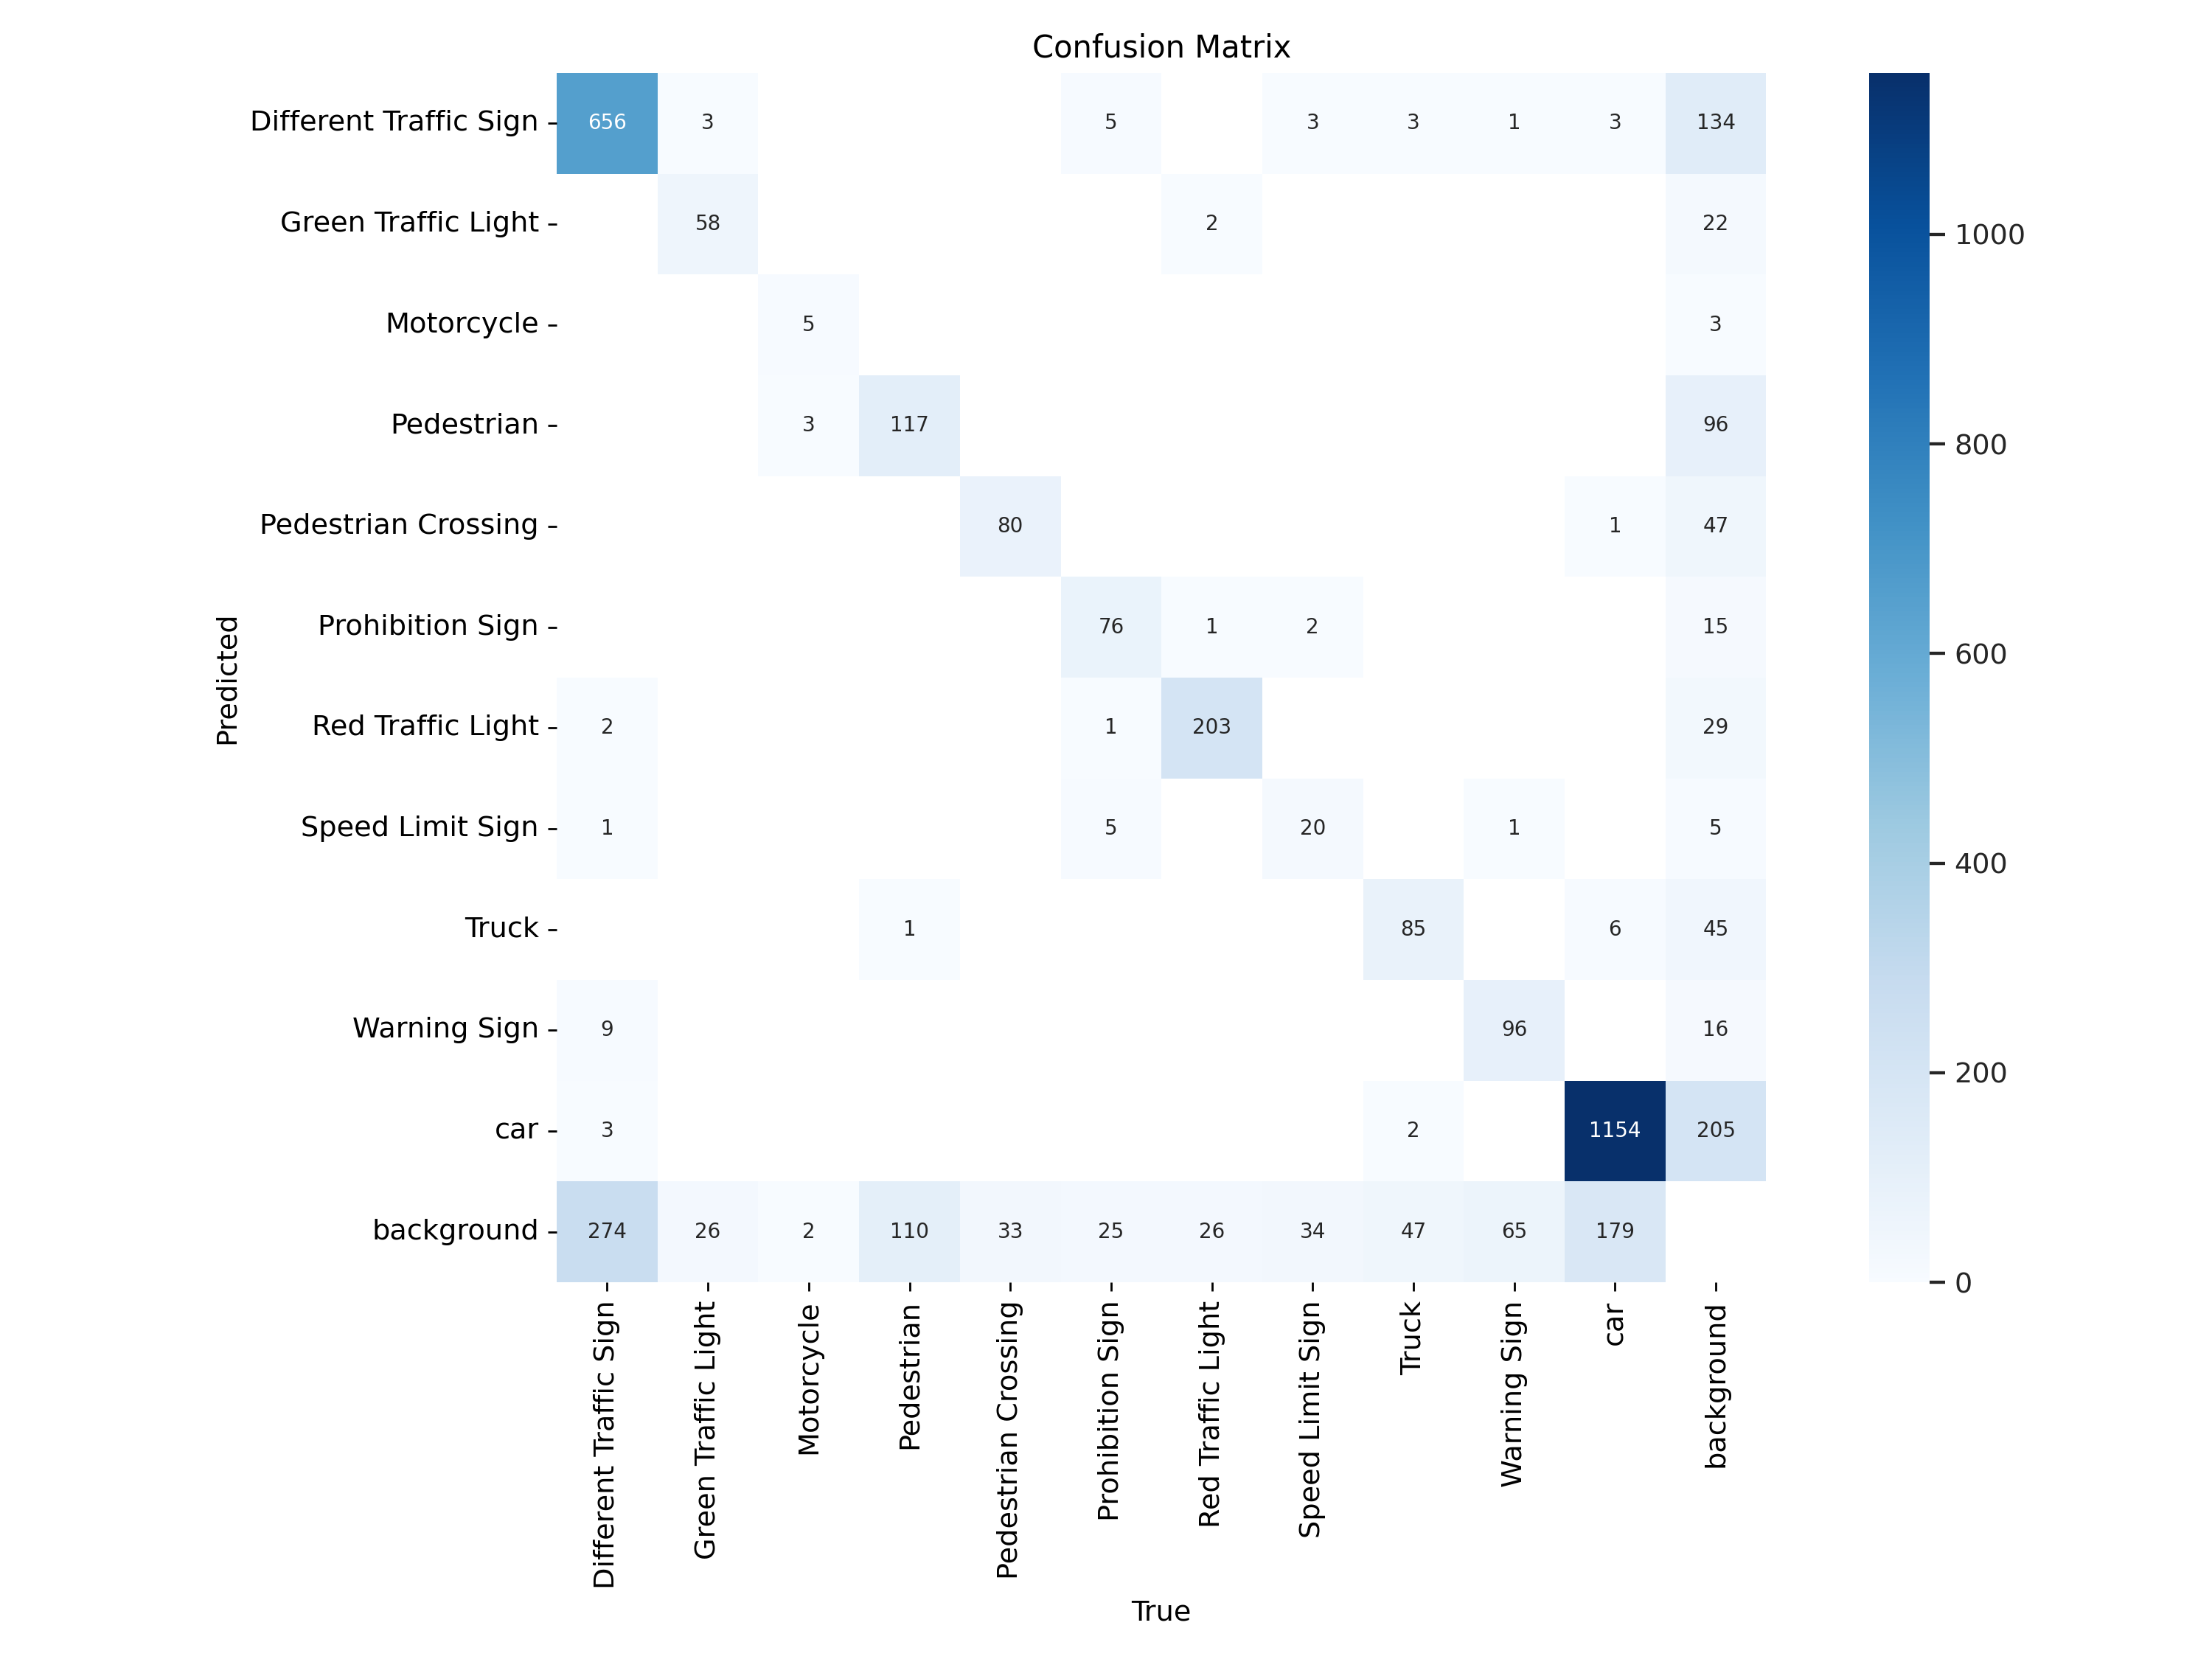

In [13]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

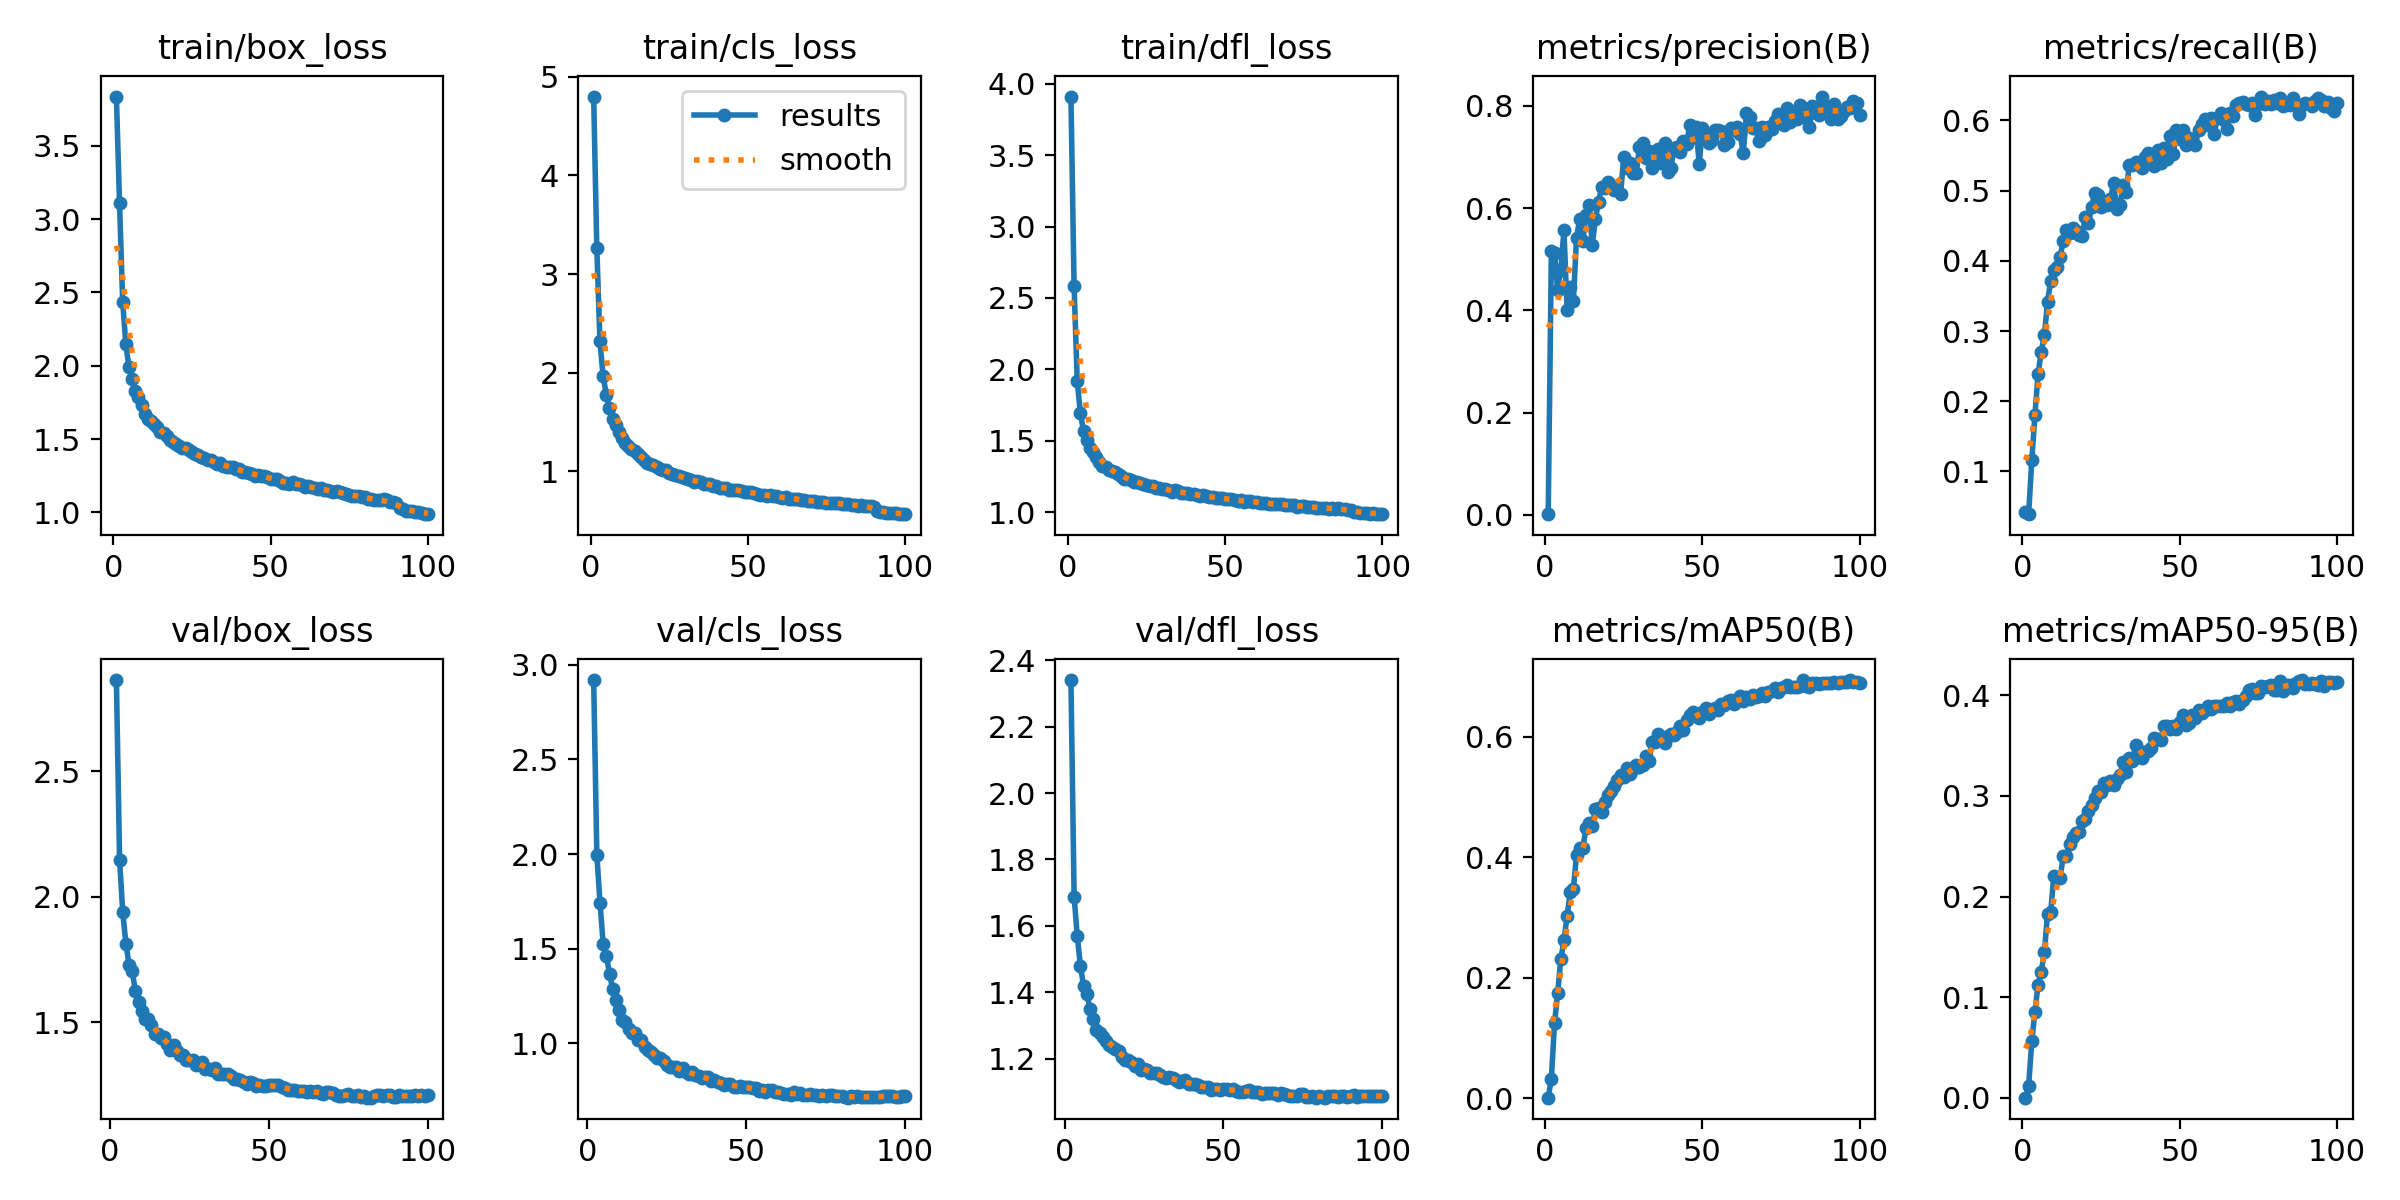

In [14]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

In [15]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['Different Traffic Sign',
 'Green Traffic Light',
 'Motorcycle',
 'Pedestrian',
 'Pedestrian Crossing',
 'Prohibition Sign',
 'Red Traffic Light',
 'Speed Limit Sign',
 'Truck',
 'Warning Sign',
 'car']

In [16]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [17]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.3973351068741684
mAP 50 0.6526158763309601
mAP 75 0.46187806931451436


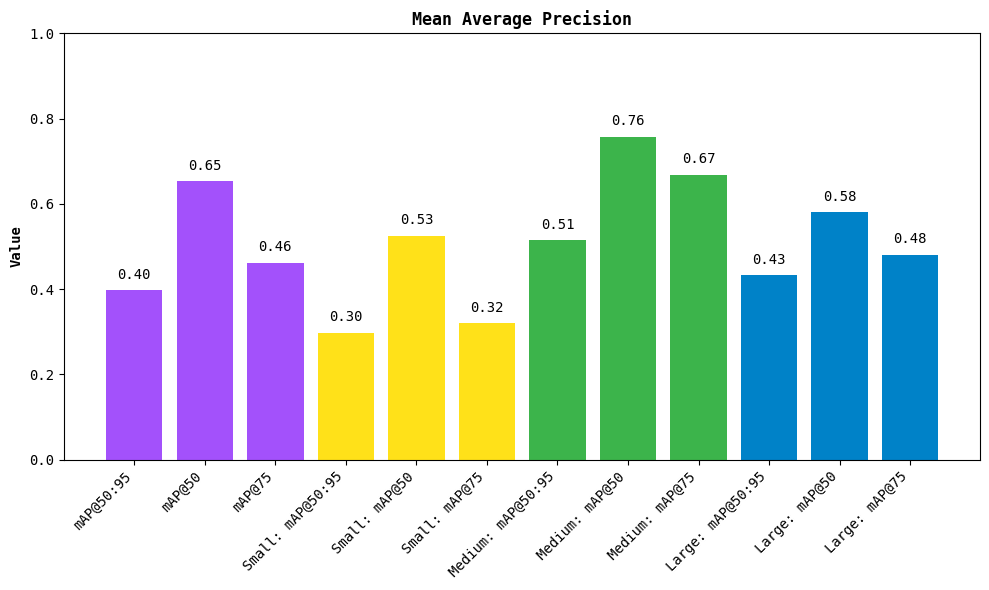

In [18]:
map.plot()

In [19]:
!cp /content/runs/detect/train/weights/best.pt /content/drive/MyDrive/best.pt

In [20]:
import supervision as sv

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

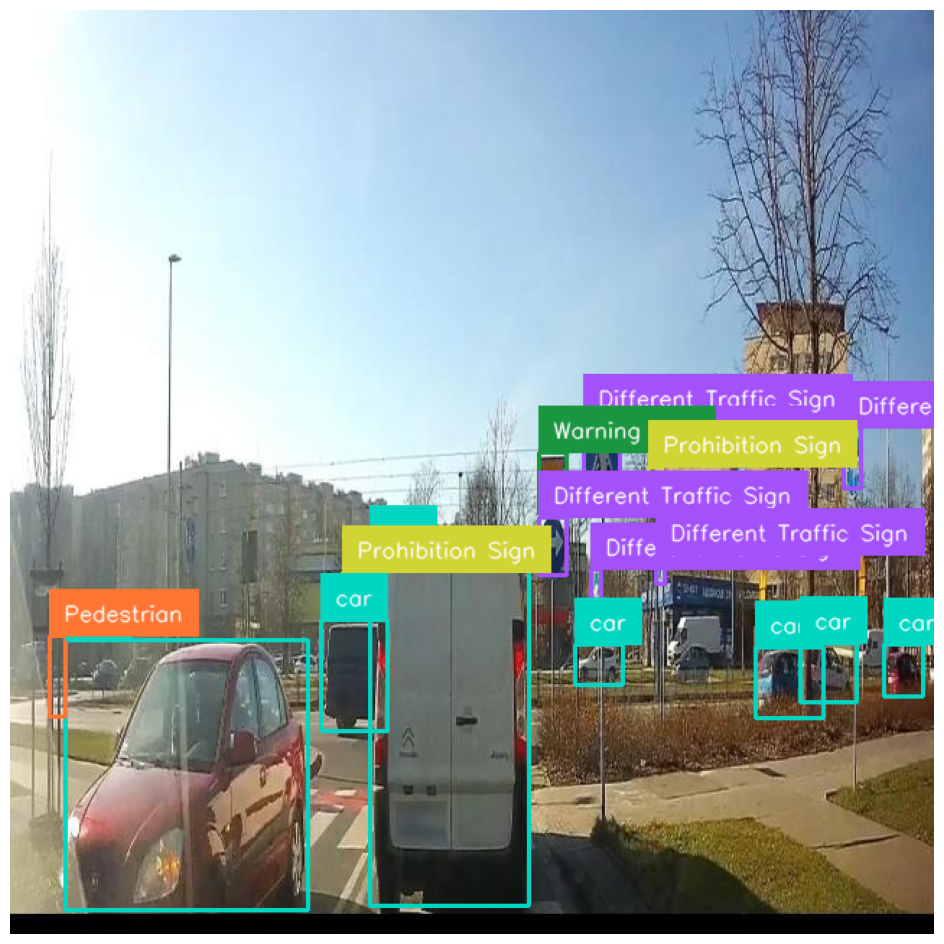

In [21]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)